In [2139]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import requests

sns.set()

In [2140]:
url = 'http://api.scb.se/OV0104/v1/doris/sv/ssd/START/BE/BE0101/BE0101E/FodelselandArK'

data = {
  "query": [
    {
      "code": "Fodelseland",
      "selection": {
        "filter": "vs:LandISOAlfa2-96A3",
        "values": [
          "AF",
          "AL",
          "DZ",
          "AD",
          "AO",
          "AG",
          "AE",
          "AR",
          "AM",
          "AU",
          "AZ",
          "BS",
          "BH",
          "BD",
          "BB",
          "BE",
          "BZ",
          "BJ",
          "BM",
          "BT",
          "BO",
          "BA",
          "BW",
          "BR",
          "VG",
          "BN",
          "BG",
          "BF",
          "BI",
          "CF",
          "CL",
          "CO",
          "KM",
          "CR",
          "CY",
          "DK",
          "DJ",
          "DM",
          "DO",
          "EC",
          "EG",
          "GQ",
          "SV",
          "CI",
          "ER",
          "EE",
          "ET",
          "FJ",
          "PH",
          "FI",
          "FR",
          "GA",
          "GM",
          "GE",
          "GH",
          "GI",
          "GR",
          "GD",
          "GT",
          "GN",
          "GW",
          "GY",
          "HT",
          "HN",
          "HK",
          "IN",
          "ID",
          "IQ",
          "IR",
          "IE",
          "IS",
          "IL",
          "IT",
          "JM",
          "JP",
          "YE",
          "JO",
          "YU",
          "KH",
          "CM",
          "CA",
          "CV",
          "KZ",
          "KE",
          "CN",
          "KG",
          "KI",
          "CG",
          "CD",
          "XK",
          "HR",
          "CU",
          "KW",
          "LA",
          "LS",
          "LV",
          "LB",
          "LR",
          "LY",
          "LI",
          "LT",
          "LU",
          "MG",
          "MW",
          "MY",
          "MV",
          "ML",
          "MT",
          "MA",
          "MH",
          "MR",
          "MU",
          "MX",
          "FM",
          "MZ",
          "MD",
          "MC",
          "MN",
          "ME",
          "MM",
          "NA",
          "NR",
          "NL",
          "NP",
          "NI",
          "NE",
          "NG",
          "KP",
          "MK",
          "NO",
          "NZ",
          "OM",
          "PK",
          "PW",
          "PS",
          "PA",
          "PG",
          "PY",
          "PE",
          "PL",
          "PT",
          "QA",
          "RO",
          "RW",
          "RU",
          "SB",
          "WS",
          "SM",
          "ST",
          "SA",
          "CH",
          "SN",
          "RS",
          "CS",
          "SC",
          "SL",
          "SG",
          "SK",
          "SI",
          "SO",
          "SU",
          "ES",
          "LK",
          "KN",
          "LC",
          "VC",
          "GB",
          "SD",
          "SR",
          "SZ",
          "SE",
          "ZA",
          "KR",
          "SS",
          "SY",
          "TJ",
          "TW",
          "TZ",
          "TD",
          "TH",
          "CZ",
          "QT",
          "TG",
          "TO",
          "TT",
          "TN",
          "TR",
          "TM",
          "TV",
          "DE",
          "UG",
          "UA",
          "HU",
          "UY",
          "US",
          "UZ",
          "VU",
          "VA",
          "VE",
          "VN",
          "BY",
          "ZM",
          "ZW",
          "AT",
          "TL",
          "ÖOF"
        ]
      }
    },
    {
      "code": "Alder",
      "selection": {
        "filter": "agg:Ålder10år",
        "values": [
          "-4",
          "5-14",
          "15-24",
          "25-34",
          "35-44",
          "45-54",
          "55-64",
          "65-74",
          "75-84",
          "85-94",
          "95+"
        ]
      }
    },
    {
      "code": "Kon",
      "selection": {
        "filter": "item",
        "values": [
          "1",
          "2"
        ]
      }
    }
  ],
  "response": {
    "format": "json"
  }
}

In [2141]:
r = requests.post(url,json=data)
r.status_code

200

In [2142]:
json = r.json()
json['data'][0]

{'key': ['AF', '-4', '1', '2000'], 'values': ['36']}

In [2143]:
data_list = []

nr_records = (len(json['data']))

for rec in range(nr_records):

    data_list.append ((json['data'][rec]['key'][0],
                        json['data'][rec]['key'][1],
                        json['data'][rec]['key'][2],
                        json['data'][rec]['key'][3],
                        json['data'][rec]['values'][0]))


In [2144]:
migrants = pd.DataFrame(data_list,columns=['abb','age','gender','year','count'])


In [2145]:
migrants

,abb,age,gender,year,count
0,AF,-4,1,2000,36
1,AF,-4,1,2001,39
2,AF,-4,1,2002,49
3,AF,-4,1,2003,49
4,AF,-4,1,2004,44
...,...,...,...,...,...
90635,ÖOF,95+,2,2015,0
90636,ÖOF,95+,2,2016,0
90637,ÖOF,95+,2,2017,4
90638,ÖOF,95+,2,2018,4


In [2146]:
country_abb = pd.read_csv('country_abb.csv',sep=';',header=None,keep_default_na=False,
                         encoding='UTF-8')
country_abb.columns = ['abb','country']
country_abb.set_index('abb',inplace=True)
country_abb

,country
abb,
AF,Afghanistan
AX,Aland Islands
AL,Albania
DZ,Algeria
AS,American Samoa
...,...
YU,Yugoslavia
ZM,Zambia
ZW,Zimbabwe


In [2147]:
country_abb.loc['US']

,country
abb,
US,United States
US,US


In [2148]:
#doesnt work!
countr_abb = country_abb[~country_abb.index.duplicated(keep='first')]
country_abb.loc['US']

,country
abb,
US,United States
US,US


In [2149]:
mask = country_abb.index.duplicated()
country_abb = country_abb[~mask]
country_abb.loc['US']

country    United States
Name: US, dtype: object

In [2150]:
migrants['count'] = migrants['count'].astype(int)
migrants_orig = migrants.copy()
migrants

,abb,age,gender,year,count
0,AF,-4,1,2000,36
1,AF,-4,1,2001,39
2,AF,-4,1,2002,49
3,AF,-4,1,2003,49
4,AF,-4,1,2004,44
...,...,...,...,...,...
90635,ÖOF,95+,2,2015,0
90636,ÖOF,95+,2,2016,0
90637,ÖOF,95+,2,2017,4
90638,ÖOF,95+,2,2018,4


In [2151]:
migrants['country'] = migrants['abb'].apply(lambda x : country_abb.loc[x,'country'])
migrants

,abb,age,gender,year,count,country
0,AF,-4,1,2000,36,Afghanistan
1,AF,-4,1,2001,39,Afghanistan
2,AF,-4,1,2002,49,Afghanistan
3,AF,-4,1,2003,49,Afghanistan
4,AF,-4,1,2004,44,Afghanistan
...,...,...,...,...,...,...
90635,ÖOF,95+,2,2015,0,Unknown
90636,ÖOF,95+,2,2016,0,Unknown
90637,ÖOF,95+,2,2017,4,Unknown
90638,ÖOF,95+,2,2018,4,Unknown


In [2152]:
migrants.groupby('year')['count'].sum()

year
2000     8882792
2001     8909128
2002     8940788
2003     8975670
2004     9011392
2005     9047752
2006     9113257
2007     9182927
2008     9256347
2009     9340682
2010     9415570
2011     9482855
2012     9555893
2013     9644864
2014     9747355
2015     9851017
2016     9995153
2017    10120242
2018    10230185
2019    10327589
Name: count, dtype: int64

In [2153]:
# https://worldpopulationreview.com/country-rankings/muslim-majority-countries
muslim_countries_ratio = pd.read_json('muslim_countries.json')
muslim_countries_ratio['pop2020'] = muslim_countries_ratio['pop2020'].astype(str).str.replace('.','').astype(int)
muslim_countries_ratio['muslimPopulation'] = muslim_countries_ratio['muslimPopulation'].astype(int)
muslim_countries_ratio[['muslim%','worldMuslim%']] = muslim_countries_ratio[['muslim%','worldMuslim%']].astype(float)
muslim_countries_ratio

,country,muslimPopulation,pop2020,muslim%,worldMuslim%
0,Indonesia,229000000,273523615,87.2,12.7
1,Pakistan,200400000,22089234,96.5,11.1
2,India,195000000,1380004385,14.2,10.9
3,Bangladesh,153700000,164689383,90.4,9.2
4,Nigeria,99000000,206139589,49.6,5.3
...,...,...,...,...,...
222,Bhutan,0,771608,0.2,0.0
223,Uruguay,0,347373,0.0,0.0
224,Costa Rica,0,5094118,0.0,0.0
225,Ecuador,0,17643054,0.0,0.0


In [2154]:
muslim_countries = (muslim_countries_ratio.loc[muslim_countries_ratio['muslim%'] > 50]).copy()
muslim_countries.sort_values('country',inplace=True)
muslim_countries.set_index('country',inplace=True)
muslim_countries

,muslimPopulation,pop2020,muslim%,worldMuslim%
country,,,,
Afghanistan,34836014,38928346,99.60,1.8
Albania,1797645,2877797,58.80,0.1
Algeria,41240913,43851044,99.00,2.7
Azerbaijan,9735074,10139177,96.90,0.5
Bahrain,1063239,1701575,73.70,0.0
Bangladesh,153700000,164689383,90.40,9.2
Bosnia and Herzegovina,1955084,3280819,50.70,0.1
Brunei,355045,437479,78.80,0.0
Burkina Faso,12141769,20903273,61.50,0.6


In [2155]:
total_pop = pd.DataFrame({'total_pop':migrants.groupby('year')['count'].sum()})
total_pop

,total_pop
year,
2000,8882792
2001,8909128
2002,8940788
2003,8975670
2004,9011392
2005,9047752
2006,9113257
2007,9182927
2008,9256347


In [2156]:
real_migrants = (migrants[migrants['abb'] != 'SE']).copy()
real_migrants

,abb,age,gender,year,count,country
0,AF,-4,1,2000,36,Afghanistan
1,AF,-4,1,2001,39,Afghanistan
2,AF,-4,1,2002,49,Afghanistan
3,AF,-4,1,2003,49,Afghanistan
4,AF,-4,1,2004,44,Afghanistan
...,...,...,...,...,...,...
90635,ÖOF,95+,2,2015,0,Unknown
90636,ÖOF,95+,2,2016,0,Unknown
90637,ÖOF,95+,2,2017,4,Unknown
90638,ÖOF,95+,2,2018,4,Unknown


In [2157]:
migrants_yearly = real_migrants.groupby('year').sum()
migrants_yearly

,count
year,
2000,1003798
2001,1027974
2002,1053463
2003,1078075
2004,1100262
2005,1125790
2006,1175200
2007,1227770
2008,1281581


In [2158]:
total_pop['foreign_born'] = migrants_yearly
total_pop['native_born'] = total_pop['total_pop'] - total_pop['foreign_born']
total_pop['foreign_born_%'] = total_pop['foreign_born'] / total_pop['total_pop'] * 100
total_pop

,total_pop,foreign_born,native_born,foreign_born_%
year,,,,
2000,8882792,1003798,7878994,11.300478
2001,8909128,1027974,7881154,11.538436
2002,8940788,1053463,7887325,11.782664
2003,8975670,1078075,7897595,12.011081
2004,9011392,1100262,7911130,12.209679
2005,9047752,1125790,7921962,12.442759
2006,9113257,1175200,7938057,12.895499
2007,9182927,1227770,7955157,13.370138
2008,9256347,1281581,7974766,13.845430


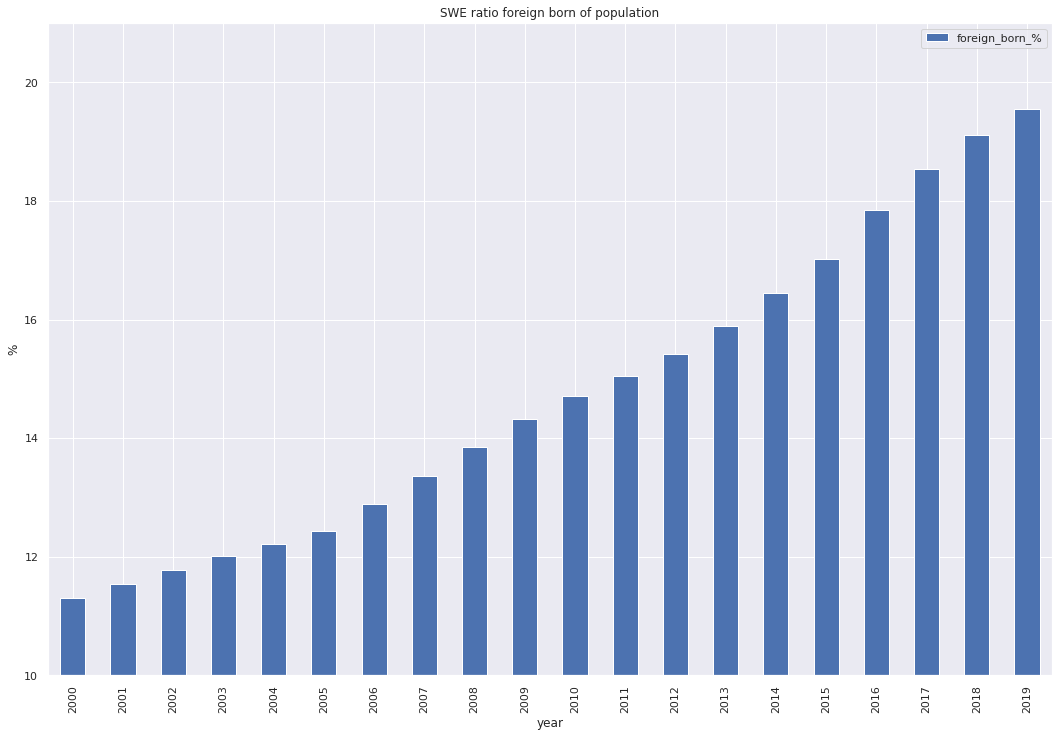

In [2159]:
total_pop.plot(kind='bar',y='foreign_born_%',
               title='SWE ratio foreign born of population',
              figsize=(18,12))

plt.ylabel('%')
plt.ylim([10,21])
plt.savefig('swe_foreign_born_pct.jpg',format='jpg')

In [2160]:
def is_muslim(country):
    '''
    try:
        muslim_countries.loc[country]
    except KeyError:
        return 0
    return 1
    '''
    
    # below didnt work if there are duplicates in the muslim_countries.index
    
    if country in np.array(muslim_countries.index):
        return 1
    return 0
    

In [2161]:
real_migrants['muslim'] = real_migrants.apply(lambda row : is_muslim(row.country),axis=1)
real_migrants

,abb,age,gender,year,count,country,muslim
0,AF,-4,1,2000,36,Afghanistan,1
1,AF,-4,1,2001,39,Afghanistan,1
2,AF,-4,1,2002,49,Afghanistan,1
3,AF,-4,1,2003,49,Afghanistan,1
4,AF,-4,1,2004,44,Afghanistan,1
...,...,...,...,...,...,...,...
90635,ÖOF,95+,2,2015,0,Unknown,0
90636,ÖOF,95+,2,2016,0,Unknown,0
90637,ÖOF,95+,2,2017,4,Unknown,0
90638,ÖOF,95+,2,2018,4,Unknown,0


In [2162]:
migrant_religion = real_migrants.groupby(['year','muslim']).sum().unstack()
migrant_religion.columns=['No','Yes']
migrant_religion.columns.name='muslim'
migrant_religion['ratio_muslim'] = migrant_religion['Yes'] / migrant_religion['No']
migrant_religion

muslim,No,Yes,ratio_muslim
year,,,
2000,739987,263811,0.356508
2001,752256,275718,0.366522
2002,764777,288686,0.377477
2003,777474,300601,0.386638
2004,790653,309609,0.391586
2005,806696,319094,0.395557
2006,831910,343290,0.412653
2007,859245,368525,0.428894
2008,888993,392588,0.441610


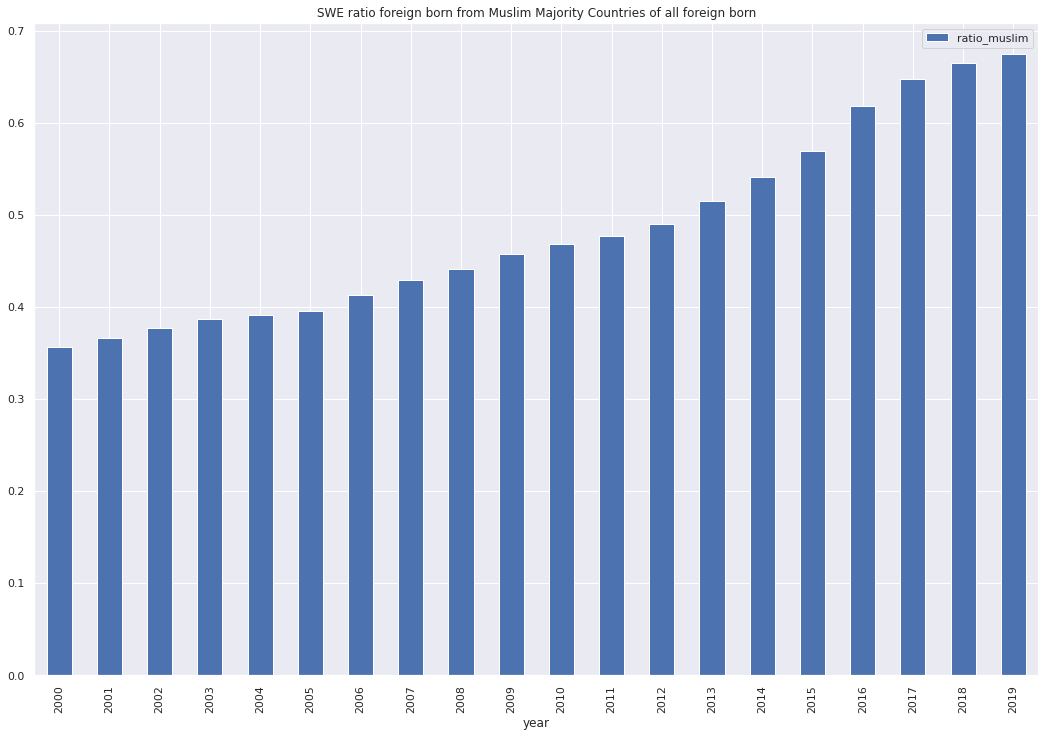

In [2163]:
migrant_religion.plot(y='ratio_muslim',kind='bar', figsize=(18,12),
                      title='SWE ratio foreign born from Muslim Majority Countries of all foreign born')
plt.savefig('swe_ratio_muslim_foreign_born.jpg',format='jpg')

In [2164]:
all_countries = pd.DataFrame(migrants['country'].unique(),columns=['country'])

In [2165]:
scb_migrant_deaths = pd.read_excel('scb_prel_deaths.xlsx',sheet_name='Tabell 9a',skiprows=11,
                                  thousands=',',usecols=[0,1,2,3,6,7,8])

In [2166]:
scb_migrant_deaths

,Vecka,Tot 15-19,InrF 15-19,UtrF 15-19,Tot 2020,InrF 2020,UtrF 2020
0,1,1187.2,1044.2,143.0,1349.0,1196.0,153.0
1,2,1947.2,1724.8,222.4,1890.0,1624.0,266.0
2,3,1951.0,1717.8,233.2,1828.0,1590.0,238.0
3,4,1944.0,1725.4,218.6,1730.0,1517.0,213.0
4,5,1911.4,1678.6,232.8,1847.0,1619.0,228.0
5,6,1905.0,1670.4,234.6,1727.0,1518.0,209.0
6,7,1901.4,1674.2,227.2,1825.0,1595.0,230.0
7,8,1978.2,1738.8,239.4,1776.0,1544.0,232.0
8,9,1989.8,1744.4,245.4,1778.0,1550.0,228.0
9,10,1957.0,1712.8,244.2,1826.0,1578.0,248.0


In [2167]:
scb_migrant_deaths.drop([54,55,56],inplace=True)

In [2168]:
unknown_date = scb_migrant_deaths.iloc[-1,1:]
deaths = scb_migrant_deaths.iloc[:-1,1:]
deaths.sum() + unknown_date

Tot 15-19     90962.4
InrF 15-19    79752.8
UtrF 15-19    11209.6
Tot 2020        81468
InrF 2020       70351
UtrF 2020       11117
dtype: object

In [2169]:
scb_migrant_deaths.sum()

Tot 15-19     90962.4
InrF 15-19    79752.8
UtrF 15-19    11209.6
Tot 2020      81468.0
InrF 2020     70351.0
UtrF 2020     11117.0
dtype: float64

In [2170]:
total_deaths = scb_migrant_deaths.sum()
total_deaths

Tot 15-19     90962.4
InrF 15-19    79752.8
UtrF 15-19    11209.6
Tot 2020      81468.0
InrF 2020     70351.0
UtrF 2020     11117.0
dtype: float64

In [2171]:
ratio_weekly_deaths = (scb_migrant_deaths.iloc[:-1,1:] ) / (total_deaths - unknown_date)
ratio_weekly_deaths


,Tot 15-19,InrF 15-19,UtrF 15-19,Tot 2020,InrF 2020,UtrF 2020
0,0.0133534,0.0133891,0.0130988,0.0170182,0.0174711,0.0141509
1,0.0219018,0.0221159,0.0203719,0.0238432,0.0237233,0.0246023
2,0.0219445,0.0220262,0.0213612,0.023061,0.0232266,0.0220126
3,0.0218658,0.0221236,0.0200238,0.0218247,0.0221602,0.0197003
4,0.0214991,0.0215235,0.0213245,0.0233007,0.0236502,0.0210877
5,0.0214271,0.0214184,0.0214894,0.0217868,0.0221748,0.0193304
6,0.0213866,0.0214671,0.0208116,0.0230232,0.0232996,0.0212727
7,0.0222505,0.0222955,0.0219291,0.022405,0.0225546,0.0214576
8,0.0223809,0.0223673,0.0224787,0.0224302,0.0226423,0.0210877
9,0.022012,0.0219621,0.0223688,0.0230358,0.0230513,0.0229375


In [2172]:
ratio_weekly_deaths.sum()

Tot 15-19     1.0
InrF 15-19    1.0
UtrF 15-19    1.0
Tot 2020      1.0
InrF 2020     1.0
UtrF 2020     1.0
dtype: float64

In [2173]:
scb_migrant_deaths.sum()

Tot 15-19     90962.4
InrF 15-19    79752.8
UtrF 15-19    11209.6
Tot 2020      81468.0
InrF 2020     70351.0
UtrF 2020     11117.0
dtype: float64

In [2174]:
# add unknown date deaths by adding weekly fraction of them to all known deaths
deaths_fixed = deaths + (ratio_weekly_deaths * unknown_date)


In [2175]:
deaths_fixed.sum()

Tot 15-19     90962.4
InrF 15-19    79752.8
UtrF 15-19    11209.6
Tot 2020      81468.0
InrF 2020     70351.0
UtrF 2020     11117.0
dtype: float64

In [2176]:
scb_migrant_deaths = deaths_fixed
scb_migrant_deaths

,Tot 15-19,InrF 15-19,UtrF 15-19,Tot 2020,InrF 2020,UtrF 2020
0,1214.66,1067.82,146.833,1386.44,1229.11,157.316
1,1992.24,1763.81,228.361,1942.45,1668.96,273.504
2,1996.13,1756.65,239.45,1878.73,1634.01,244.714
3,1988.96,1764.42,224.459,1778.01,1558.99,219.009
4,1955.61,1716.56,239.04,1898.26,1663.82,234.432
5,1949.06,1708.18,240.888,1774.93,1560.02,214.896
6,1945.38,1712.06,233.289,1875.65,1639.15,236.488
7,2023.96,1778.12,245.816,1825.29,1586.74,238.545
8,2035.82,1783.85,251.977,1827.35,1592.91,234.432
9,2002.27,1751.54,250.745,1876.68,1621.68,254.996


In [2177]:
scb_migrant_deaths.index = range(1,len(scb_migrant_deaths) + 1)


In [2178]:
scb_migrant_deaths = scb_migrant_deaths.astype(float)

In [2179]:
scb_migrant_deaths.sum()

Tot 15-19     90962.4
InrF 15-19    79752.8
UtrF 15-19    11209.6
Tot 2020      81468.0
InrF 2020     70351.0
UtrF 2020     11117.0
dtype: float64

In [2180]:
(scb_migrant_deaths.sum())['InrF 2020'] + (scb_migrant_deaths.sum())['UtrF 2020']

81468.0

In [2181]:
pop_2015_2019 = total_pop.loc['2014' : '2018'].mean()
pop_2020 = total_pop.loc['2019']

print(pop_2015_2019)
print (pop_2020)

total_pop         9.988790e+06
foreign_born      1.779386e+06
native_born       8.209404e+06
foreign_born_%    1.779681e+01
dtype: float64
total_pop         1.032759e+07
foreign_born      2.019733e+06
native_born       8.307856e+06
foreign_born_%    1.955667e+01
Name: 2019, dtype: float64


In [2182]:
pop_growth = pd.DataFrame(
    {'birthplace': [pop_2020['foreign_born'] / pop_2015_2019['foreign_born'],
                   pop_2020['native_born'] / pop_2015_2019['native_born']]},index=['UtrF','InrF'])
pop_growth


,birthplace
UtrF,1.135073
InrF,1.011993


In [2183]:
tot_15_19_per_M = scb_migrant_deaths['Tot 15-19'] / (pop_2015_2019['total_pop'] / 1e6)
foreign_15_19_per_M = scb_migrant_deaths['UtrF 15-19'] / (pop_2015_2019['foreign_born'] / 1e6)
native_15_19_per_M = scb_migrant_deaths['InrF 15-19'] / (pop_2015_2019['native_born'] / 1e6)
tot_2020_per_M = scb_migrant_deaths['Tot 2020'] / (pop_2020['total_pop'] / 1e6)
foreign_2020_per_M = scb_migrant_deaths['UtrF 2020'] / (pop_2020['foreign_born'] / 1e6)
native_2020_per_M = scb_migrant_deaths['InrF 2020'] / (pop_2020['native_born'] / 1e6)


In [2184]:
deaths_per_m = pd.concat([tot_15_19_per_M,foreign_15_19_per_M,native_15_19_per_M,
                         tot_2020_per_M,foreign_2020_per_M,native_2020_per_M],axis=1)

deaths_per_m.index = range(1,len(deaths_per_m) +1 )

last_data = (deaths_per_m.loc[deaths_per_m['Tot 2020'] != 0]).index[-1]
last_good_data = last_data - 1
deaths_per_m = deaths_per_m.loc[:last_good_data]
deaths_per_m

,Tot 15-19,UtrF 15-19,InrF 15-19,Tot 2020,UtrF 2020,InrF 2020
1,121.602311,82.518747,130.072245,134.246248,77.889522,147.945233
2,199.447455,128.336848,214.852144,188.084069,135.415770,200.888844
3,199.836681,134.569034,213.980179,181.914115,121.161479,196.683044
4,199.119686,126.144043,214.926884,172.161608,108.434432,187.652942
5,195.780539,134.338212,209.097176,183.804908,116.070660,200.270344
6,195.125001,135.376909,208.075731,171.863062,106.398105,187.776642
7,194.756261,131.106708,208.549084,181.615569,117.088824,197.301544
8,202.622718,138.146769,216.596074,176.739316,118.106987,190.992842
9,203.810881,141.609094,217.293646,176.938346,116.070660,191.735042
10,200.451248,140.916629,213.357347,181.715085,126.252297,195.198643


In [2185]:
deaths_per_m.sum()

Tot 15-19     7751.655645
UtrF 15-19    5362.218213
InrF 15-19    8269.565352
Tot 2020      7858.630080
UtrF 2020     5474.666134
InrF 2020     8438.197368
dtype: float64

In [2186]:
scb_migrant_deaths

,Tot 15-19,InrF 15-19,UtrF 15-19,Tot 2020,InrF 2020,UtrF 2020
1,1214.659992,1067.815638,146.832720,1386.440077,1229.107690,157.316038
2,1992.238828,1763.808094,228.360817,1942.454963,1668.955592,273.503700
3,1996.126723,1756.649782,239.450281,1878.734218,1634.014403,244.713836
4,1988.964812,1764.421664,224.458969,1778.014331,1558.993616,219.008602
5,1955.610773,1716.563234,239.039560,1898.261543,1663.817182,234.431743
6,1949.062740,1708.177783,240.887804,1774.931069,1560.021298,214.895764
7,1945.379472,1712.063724,233.289468,1875.650956,1639.152813,236.488161
8,2023.955860,1778.124718,245.816455,1825.291013,1586.741031,238.544580
9,2035.824168,1783.851368,251.977268,1827.346521,1592.907123,234.431743
10,2002.265503,1751.536702,250.745106,1876.678710,1621.682219,254.995930


In [2187]:
scb_migrant_deaths.sum()

Tot 15-19     90962.4
InrF 15-19    79752.8
UtrF 15-19    11209.6
Tot 2020      81468.0
InrF 2020     70351.0
UtrF 2020     11117.0
dtype: float64

In [2188]:
pop_2020

total_pop         1.032759e+07
foreign_born      2.019733e+06
native_born       8.307856e+06
foreign_born_%    1.955667e+01
Name: 2019, dtype: float64

In [2189]:
pop = pd.DataFrame({'Tot 15-19' : pop_2015_2019['total_pop'],
                   'UtrF 15-19' : pop_2015_2019['foreign_born'],
                   'InrF 15-19' : pop_2015_2019['native_born'],
                   'Tot 2020' : pop_2020['total_pop'],
                   'UtrF 2020' : pop_2020['foreign_born'],
                   'InrF 2020' : pop_2020['native_born']},index=['pop'])
pop

,Tot 15-19,UtrF 15-19,InrF 15-19,Tot 2020,UtrF 2020,InrF 2020
pop,9988790.4,1779386.2,8209404.2,10327589.0,2019733.0,8307856.0


In [2190]:
mortality = scb_migrant_deaths.iloc[:,:] / pop.loc['pop',:]
mortality

,InrF 15-19,InrF 2020,Tot 15-19,Tot 2020,UtrF 15-19,UtrF 2020
1,0.000130,0.000148,0.000122,0.000134,0.000083,0.000078
2,0.000215,0.000201,0.000199,0.000188,0.000128,0.000135
3,0.000214,0.000197,0.000200,0.000182,0.000135,0.000121
4,0.000215,0.000188,0.000199,0.000172,0.000126,0.000108
5,0.000209,0.000200,0.000196,0.000184,0.000134,0.000116
6,0.000208,0.000188,0.000195,0.000172,0.000135,0.000106
7,0.000209,0.000197,0.000195,0.000182,0.000131,0.000117
8,0.000217,0.000191,0.000203,0.000177,0.000138,0.000118
9,0.000217,0.000192,0.000204,0.000177,0.000142,0.000116
10,0.000213,0.000195,0.000200,0.000182,0.000141,0.000126


In [2191]:
mortality = mortality.loc[:last_good_data]
mortality

,InrF 15-19,InrF 2020,Tot 15-19,Tot 2020,UtrF 15-19,UtrF 2020
1,0.000130,0.000148,0.000122,0.000134,0.000083,0.000078
2,0.000215,0.000201,0.000199,0.000188,0.000128,0.000135
3,0.000214,0.000197,0.000200,0.000182,0.000135,0.000121
4,0.000215,0.000188,0.000199,0.000172,0.000126,0.000108
5,0.000209,0.000200,0.000196,0.000184,0.000134,0.000116
6,0.000208,0.000188,0.000195,0.000172,0.000135,0.000106
7,0.000209,0.000197,0.000195,0.000182,0.000131,0.000117
8,0.000217,0.000191,0.000203,0.000177,0.000138,0.000118
9,0.000217,0.000192,0.000204,0.000177,0.000142,0.000116
10,0.000213,0.000195,0.000200,0.000182,0.000141,0.000126


<AxesSubplot:>

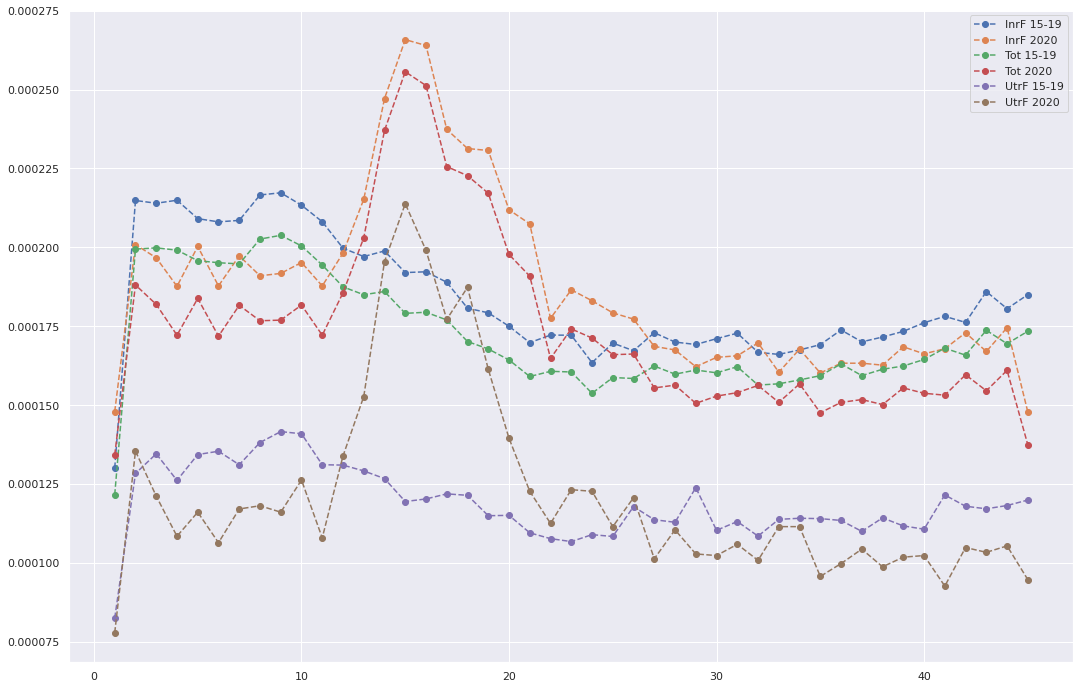

In [2192]:
mortality.plot(figsize=(18,12),style='o--')

<AxesSubplot:>

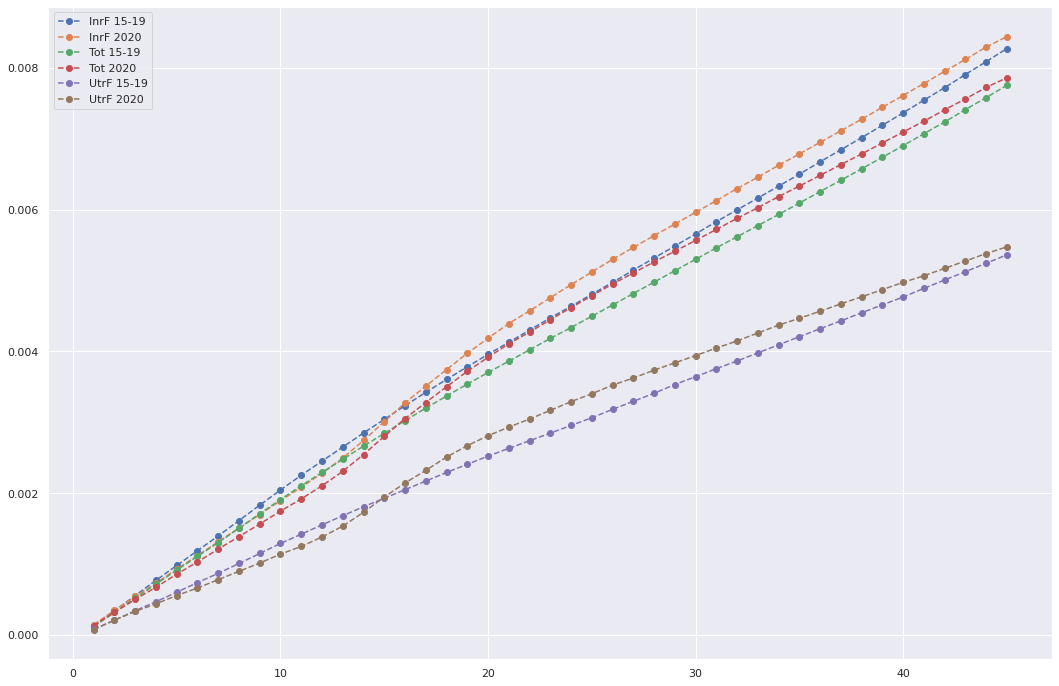

In [2193]:
mortality.cumsum().plot(figsize=(18,12),style='o--')

In [2194]:
abs_deaths = mortality * pop.loc['pop']

abs_deaths

,InrF 15-19,InrF 2020,Tot 15-19,Tot 2020,UtrF 15-19,UtrF 2020
1,1067.815638,1229.107690,1214.659992,1386.440077,146.832720,157.316038
2,1763.808094,1668.955592,1992.238828,1942.454963,228.360817,273.503700
3,1756.649782,1634.014403,1996.126723,1878.734218,239.450281,244.713836
4,1764.421664,1558.993616,1988.964812,1778.014331,224.458969,219.008602
5,1716.563234,1663.817182,1955.610773,1898.261543,239.039560,234.431743
6,1708.177783,1560.021298,1949.062740,1774.931069,240.887804,214.895764
7,1712.063724,1639.152813,1945.379472,1875.650956,233.289468,236.488161
8,1778.124718,1586.741031,2023.955860,1825.291013,245.816455,238.544580
9,1783.851368,1592.907123,2035.824168,1827.346521,251.977268,234.431743
10,1751.536702,1621.682219,2002.265503,1876.678710,250.745106,254.995930


In [2195]:
abs_deaths.sum()

InrF 15-19    67888.204529
InrF 2020     70103.328634
Tot 15-19     77429.663488
Tot 2020      81160.701569
UtrF 15-19     9541.457089
UtrF 2020     11057.363855
dtype: float64

In [2196]:
mortality

,InrF 15-19,InrF 2020,Tot 15-19,Tot 2020,UtrF 15-19,UtrF 2020
1,0.000130,0.000148,0.000122,0.000134,0.000083,0.000078
2,0.000215,0.000201,0.000199,0.000188,0.000128,0.000135
3,0.000214,0.000197,0.000200,0.000182,0.000135,0.000121
4,0.000215,0.000188,0.000199,0.000172,0.000126,0.000108
5,0.000209,0.000200,0.000196,0.000184,0.000134,0.000116
6,0.000208,0.000188,0.000195,0.000172,0.000135,0.000106
7,0.000209,0.000197,0.000195,0.000182,0.000131,0.000117
8,0.000217,0.000191,0.000203,0.000177,0.000138,0.000118
9,0.000217,0.000192,0.000204,0.000177,0.000142,0.000116
10,0.000213,0.000195,0.000200,0.000182,0.000141,0.000126


In [2197]:
mortality_diff_UtrF = mortality['UtrF 2020'] - mortality['UtrF 15-19']
mortality_diff_InrF = mortality['InrF 2020'] - mortality['InrF 15-19']
mortality_diff_Tot = mortality['Tot 2020'] - mortality['Tot 15-19']

mortality_diff = pd.concat([mortality_diff_UtrF,mortality_diff_InrF,mortality_diff_Tot],axis=1)
mortality_diff.columns = ['UtrF','InrF','Tot']
mortality_diff

,UtrF,InrF,Tot
1,-0.000005,1.787299e-05,1.264394e-05
2,0.000007,-1.396330e-05,-1.136339e-05
3,-0.000013,-1.729714e-05,-1.792257e-05
4,-0.000018,-2.727394e-05,-2.695808e-05
5,-0.000018,-8.826832e-06,-1.197563e-05
6,-0.000029,-2.029909e-05,-2.326194e-05
7,-0.000014,-1.124754e-05,-1.314069e-05
8,-0.000020,-2.560323e-05,-2.588340e-05
9,-0.000026,-2.555860e-05,-2.687253e-05
10,-0.000015,-1.815870e-05,-1.873616e-05


<AxesSubplot:>

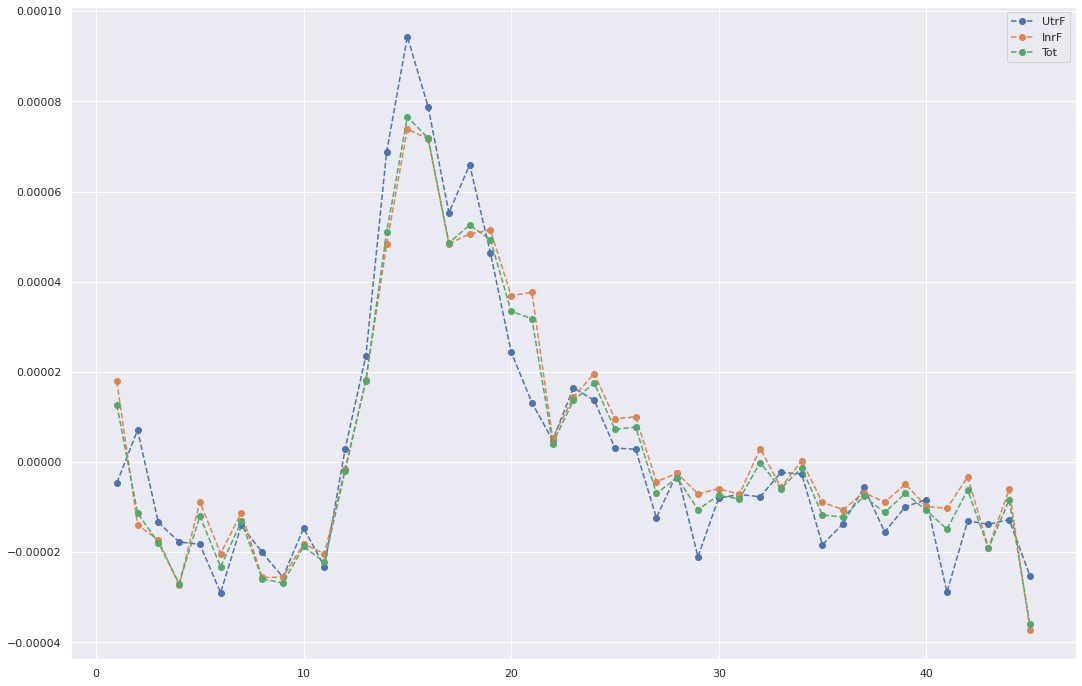

In [2198]:
mortality_diff.plot(figsize=(18,12),style=['o--'] * 3)

In [2199]:
mortality_diff.cumsum()

,UtrF,InrF,Tot
1,-0.000005,0.000018,0.000013
2,0.000002,0.000004,0.000001
3,-0.000011,-0.000013,-0.000017
4,-0.000029,-0.000041,-0.000044
5,-0.000047,-0.000049,-0.000056
6,-0.000076,-0.000070,-0.000079
7,-0.000090,-0.000081,-0.000092
8,-0.000110,-0.000107,-0.000118
9,-0.000136,-0.000132,-0.000145
10,-0.000150,-0.000150,-0.000163


<AxesSubplot:>

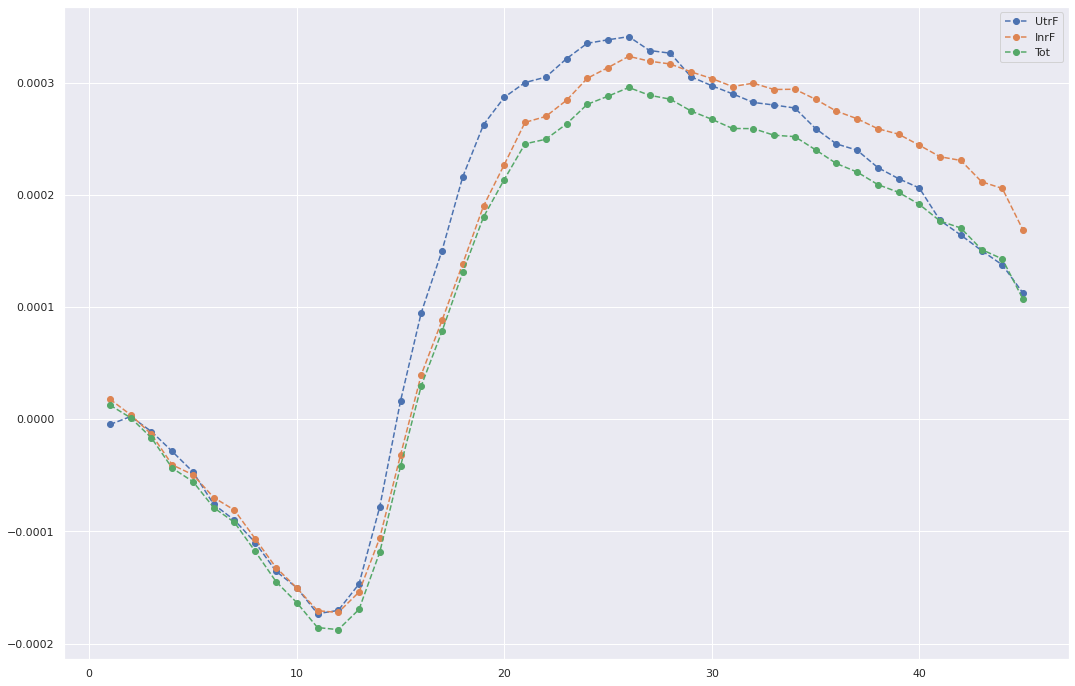

In [2200]:
mortality_diff.cumsum().plot(figsize=(18,12),style='o--')

In [2201]:
abs_diff = mortality_diff * popsie.loc['pop']
abs_diff

,InrF,Tot,UtrF
1,148.486205,130.581392,-9.349799
2,-116.005082,-117.356384,14.297532
3,-143.702112,-185.096892,-27.079681
4,-226.587986,-278.411952,-35.768684
5,-73.332046,-123.679402,-36.895577
6,-168.641915,-240.239748,-58.529447
7,-93.442943,-135.711665,-28.312384
8,-212.707961,-267.313140,-40.475009
9,-212.337195,-277.528489,-51.580819
10,-150.859897,-193.499395,-29.618036


In [2202]:
abs_diff.cumsum()

,InrF,Tot,UtrF
1,148.486205,130.581392,-9.349799
2,32.481123,13.225008,4.947733
3,-111.220989,-171.871885,-22.131948
4,-337.808975,-450.283837,-57.900632
5,-411.141021,-573.963239,-94.796209
6,-579.782936,-814.202988,-153.325657
7,-673.225879,-949.914652,-181.638041
8,-885.933840,-1217.227793,-222.113050
9,-1098.271035,-1494.756281,-273.693869
10,-1249.130933,-1688.255676,-303.311905


<AxesSubplot:>

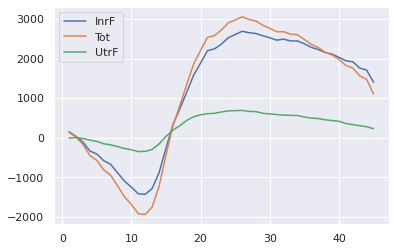

In [2203]:
abs_diff.cumsum().plot()

In [2204]:
mortality
growth_UtrF = mortality['UtrF 2020'] / mortality['UtrF 15-19']
growth_InrF = mortality['InrF 2020'] / mortality['InrF 15-19']

growth = pd.concat([growth_UtrF,growth_InrF],axis=1)
growth.columns = ['Foreign Born','Native Born']
growth

,Foreign Born,Native Born
1,0.943901,1.137408
2,1.055159,0.935010
3,0.900367,0.919165
4,0.859608,0.873101
5,0.864018,0.957786
6,0.785940,0.902444
7,0.893080,0.946068
8,0.854938,0.881793
9,0.819655,0.882378
10,0.895936,0.914891


In [2205]:
growth.max()

Foreign Born    1.789987
Native Born     1.384490
dtype: float64

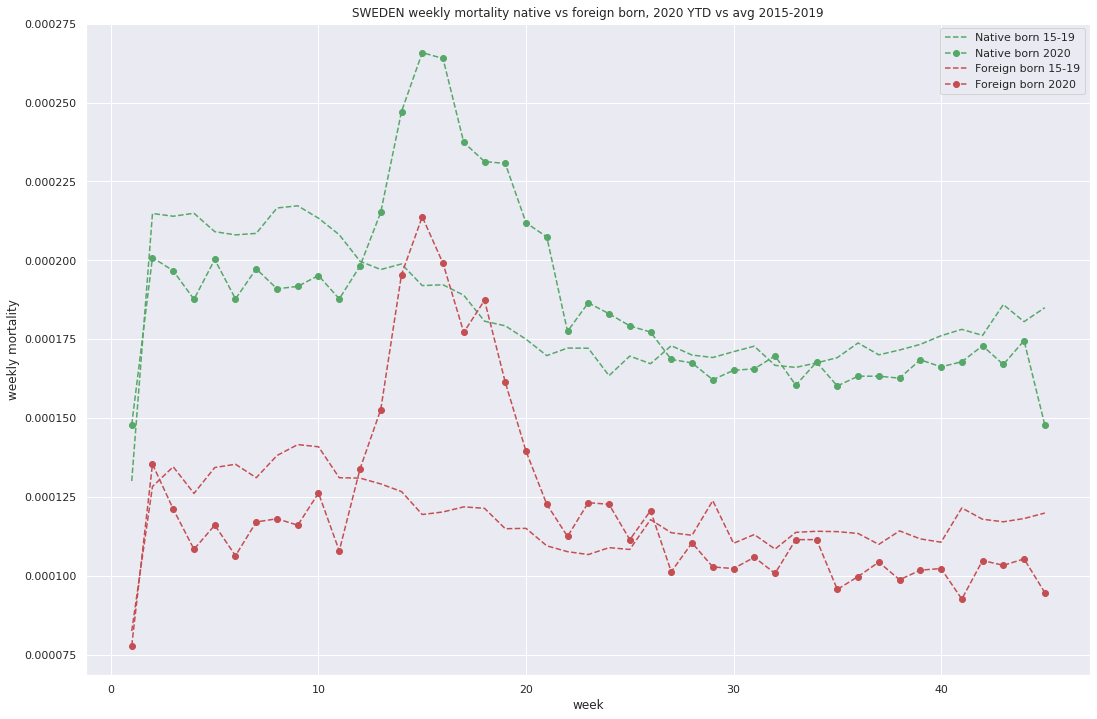

In [2206]:
title = 'SWEDEN weekly mortality native vs foreign born, 2020 YTD vs avg 2015-2019'
mortality.plot(y=['InrF 15-19','InrF 2020','UtrF 15-19','UtrF 2020'],figsize=(18,12),
               style=['g--','go--','r--','ro--'],title=title)

plt.legend(['Native born 15-19','Native born 2020','Foreign born 15-19','Foreign born 2020'])
plt.ylabel('weekly mortality')
plt.xlabel('week')
plt.savefig('swe_native_vs_foreign_mort.jpg',format='jpg')

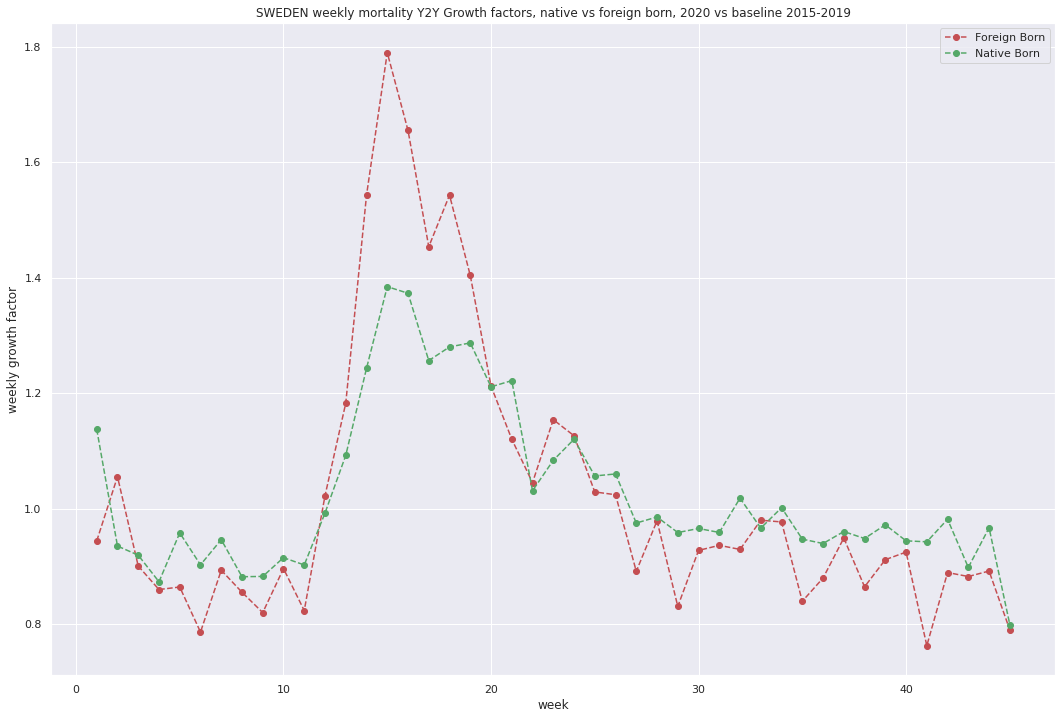

In [2207]:
title = 'SWEDEN weekly mortality Y2Y Growth factors, native vs foreign born, 2020 vs baseline 2015-2019'
growth.plot(figsize=(18,12),style=['ro--','go--'],title=title)
plt.ylabel ('weekly growth factor')
plt.xlabel('week')
plt.savefig('swe_native_vs_foreign_growth.jpg',format='jpg')

In [2208]:
std_abs_deaths = mortality * std_pop.loc['pop']
std_abs_deaths

,InrF 15-19,InrF 2020,Tot 15-19,Tot 2020,UtrF 15-19,UtrF 2020
1,1080.621484,1229.107690,1255.858685,1386.440077,166.665836,157.316038
2,1784.960674,1668.955592,2059.811347,1942.454963,259.206168,273.503700
3,1777.716516,1634.014403,2063.831110,1878.734218,271.793518,244.713836
4,1785.581602,1558.993616,2056.426283,1778.014331,254.777286,219.008602
5,1737.149228,1663.817182,2021.940945,1898.261543,271.327320,234.431743
6,1728.663213,1560.021298,2015.170818,1774.931069,273.425211,214.895764
7,1732.595757,1639.152813,2011.362621,1875.650956,264.800546,236.488161
8,1799.448991,1586.741031,2092.604153,1825.291013,279.019589,238.544580
9,1805.244318,1592.907123,2104.875009,1827.346521,286.012561,234.431743
10,1772.542117,1621.682219,2070.178105,1876.678710,284.613967,254.995930


In [2209]:
std_abs_deaths_sum = std_abs_deaths.sum()
std_abs_deaths_sum

InrF 15-19    68702.358123
InrF 2020     70103.328634
Tot 15-19     80055.913568
Tot 2020      81160.701569
UtrF 15-19    10830.249077
UtrF 2020     11057.363855
dtype: float64

In [2210]:
tot_std_deaths_15_19 = std_abs_deaths_sum['InrF 15-19'] + std_abs_deaths_sum['UtrF 15-19']
tot_std_deaths_2020 = std_abs_deaths_sum['InrF 2020'] + std_abs_deaths_sum['UtrF 2020']

tot_std_deaths = pd.DataFrame([tot_std_deaths_15_19,tot_std_deaths_2020])
tot_std_deaths

,0
0,79532.607201
1,81160.692489


In [2211]:
scb_migrant_deaths.sum()

Tot 15-19     90962.4
InrF 15-19    79752.8
UtrF 15-19    11209.6
Tot 2020      81468.0
InrF 2020     70351.0
UtrF 2020     11117.0
dtype: float64

In [2212]:
std_pop

,Tot 15-19,UtrF 15-19,InrF 15-19,Tot 2020,UtrF 2020,InrF 2020
pop,10327589.0,2019733.0,8307856.0,10327589.0,2019733.0,8307856.0


In [2213]:
std_2020_pop = std_pop.loc['pop','Tot 2020' : 'InrF 2020']
std_2020_pop.index = ['Tot','UtrF','InrF']
std_2020_pop

Tot     10327589.0
UtrF     2019733.0
InrF     8307856.0
Name: pop, dtype: float64

In [2214]:
adj_excess_deaths = mortality_diff * std_2020_pop

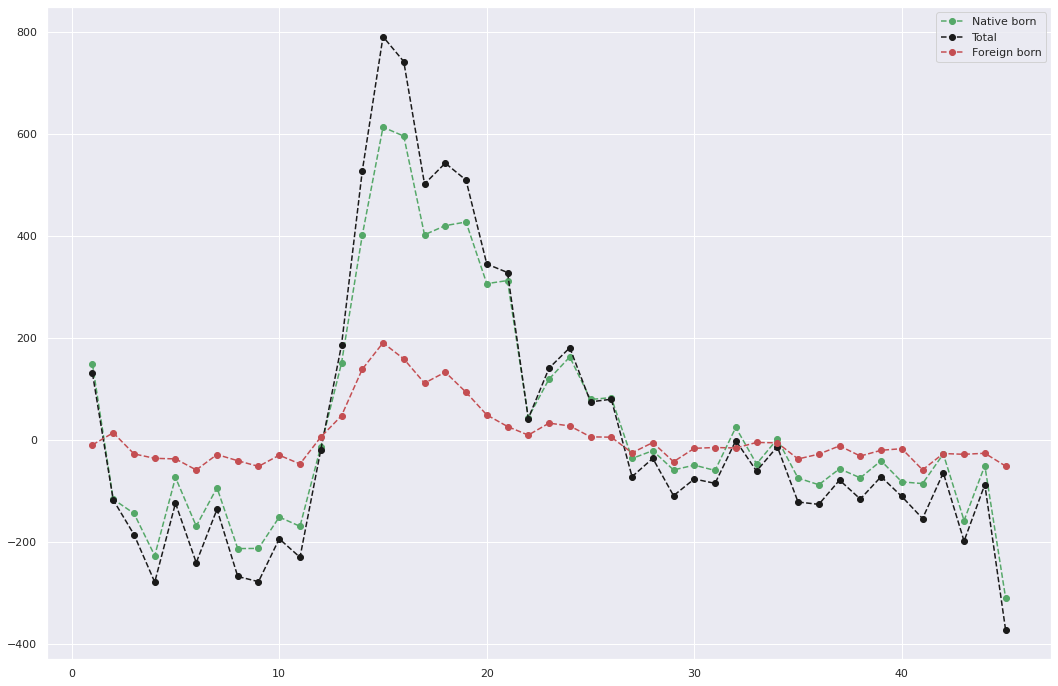

In [2215]:
# if both cohorts have neg excess, tot is below both. If both cohorts have pos excess, tot is above both

adj_excess_deaths.plot(figsize=(18,12),style=['go--','ko--','ro--'])
plt.legend(['Native born','Total','Foreign born'])

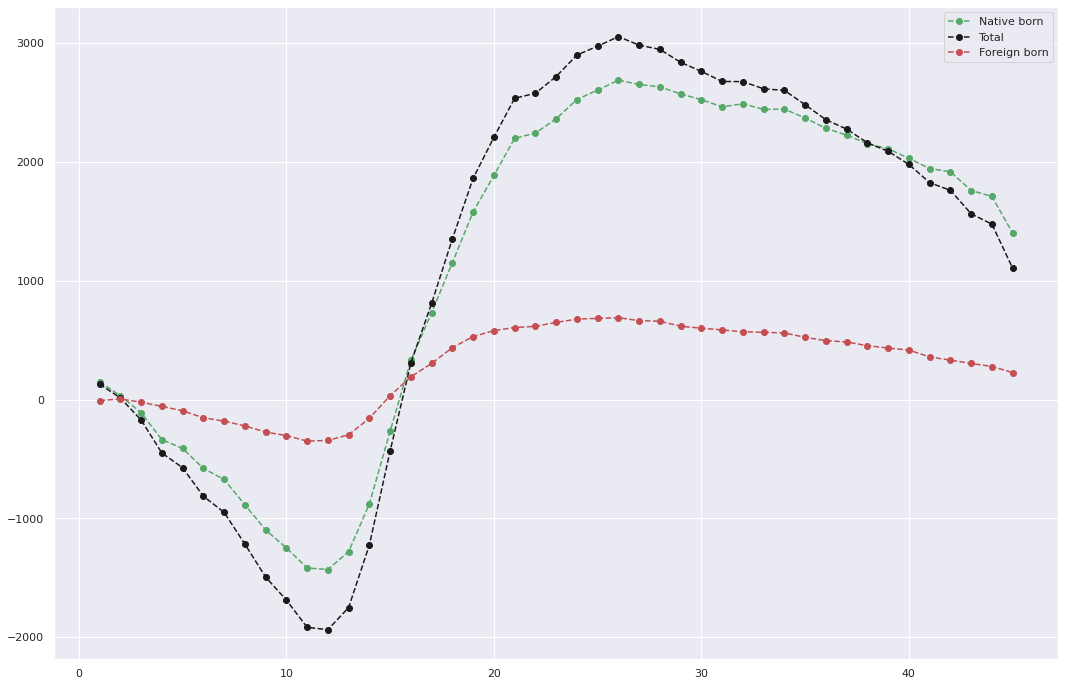

In [2216]:
adj_excess_deaths_cum = adj_excess_deaths.cumsum()
adj_excess_deaths_cum.plot(figsize=(18,12),style=['go--','ko--','ro--'])
plt.legend(['Native born','Total','Foreign born'])

<AxesSubplot:>

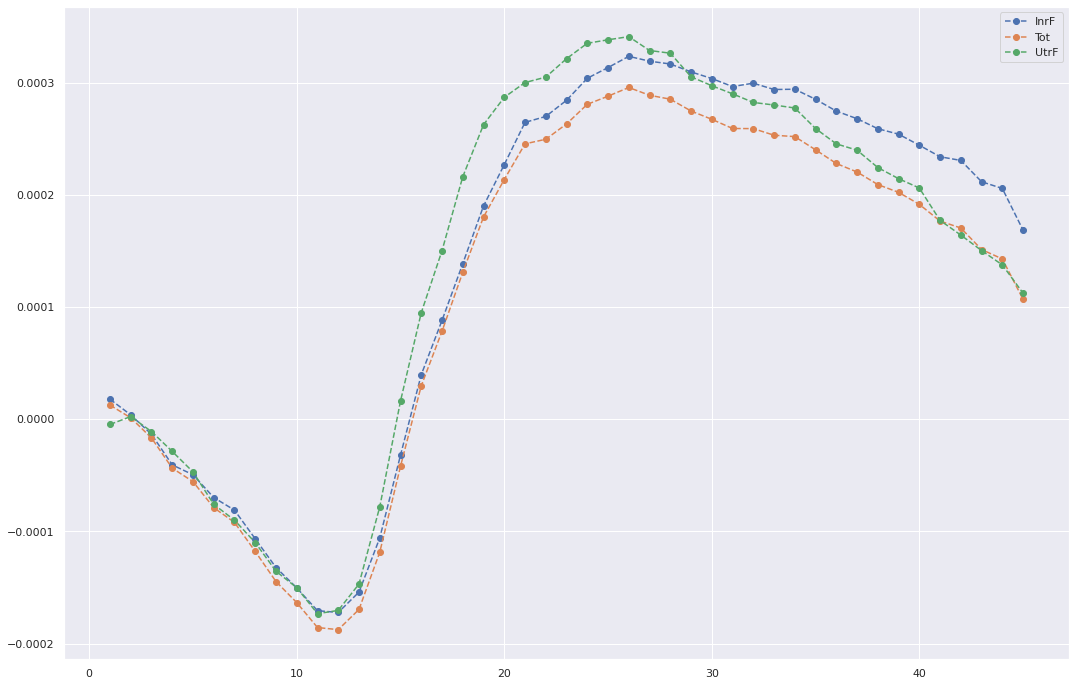

In [2217]:
(adj_excess_deaths_cum / std_2020_pop).plot(figsize=(18,12),style='o--')

In [2218]:
mortality_diff

,UtrF,InrF,Tot
1,-0.000005,1.787299e-05,1.264394e-05
2,0.000007,-1.396330e-05,-1.136339e-05
3,-0.000013,-1.729714e-05,-1.792257e-05
4,-0.000018,-2.727394e-05,-2.695808e-05
5,-0.000018,-8.826832e-06,-1.197563e-05
6,-0.000029,-2.029909e-05,-2.326194e-05
7,-0.000014,-1.124754e-05,-1.314069e-05
8,-0.000020,-2.560323e-05,-2.588340e-05
9,-0.000026,-2.555860e-05,-2.687253e-05
10,-0.000015,-1.815870e-05,-1.873616e-05


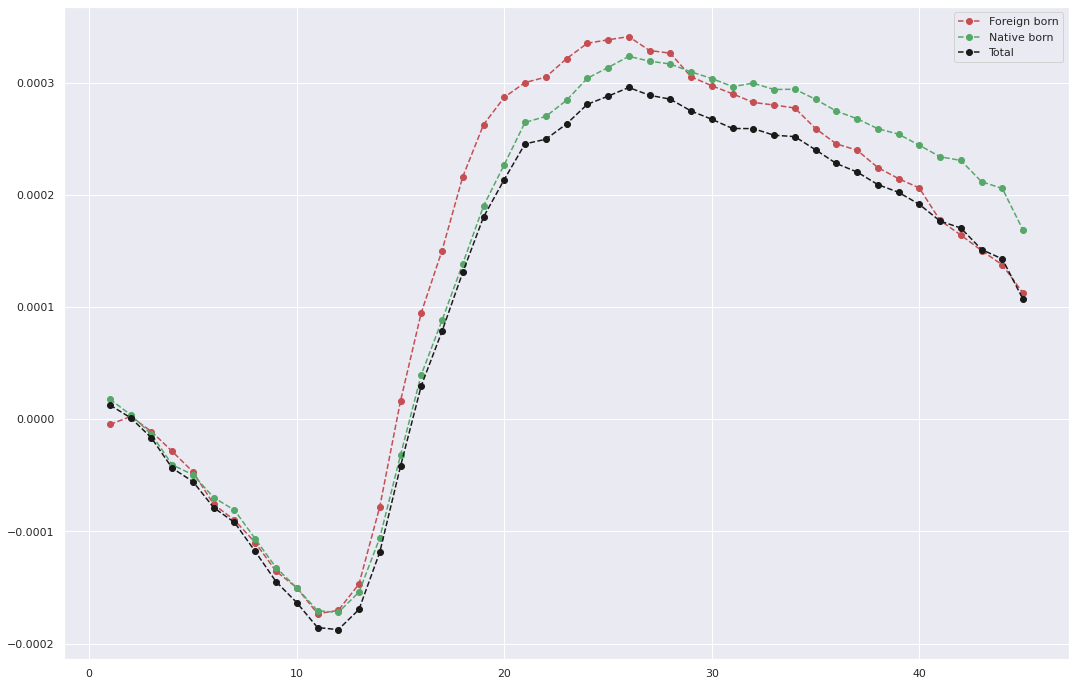

In [2219]:
mortality_diff.cumsum().plot(figsize=(18,12),style=['ro--','go--','ko--'])
plt.legend(['Foreign born','Native born','Total'])

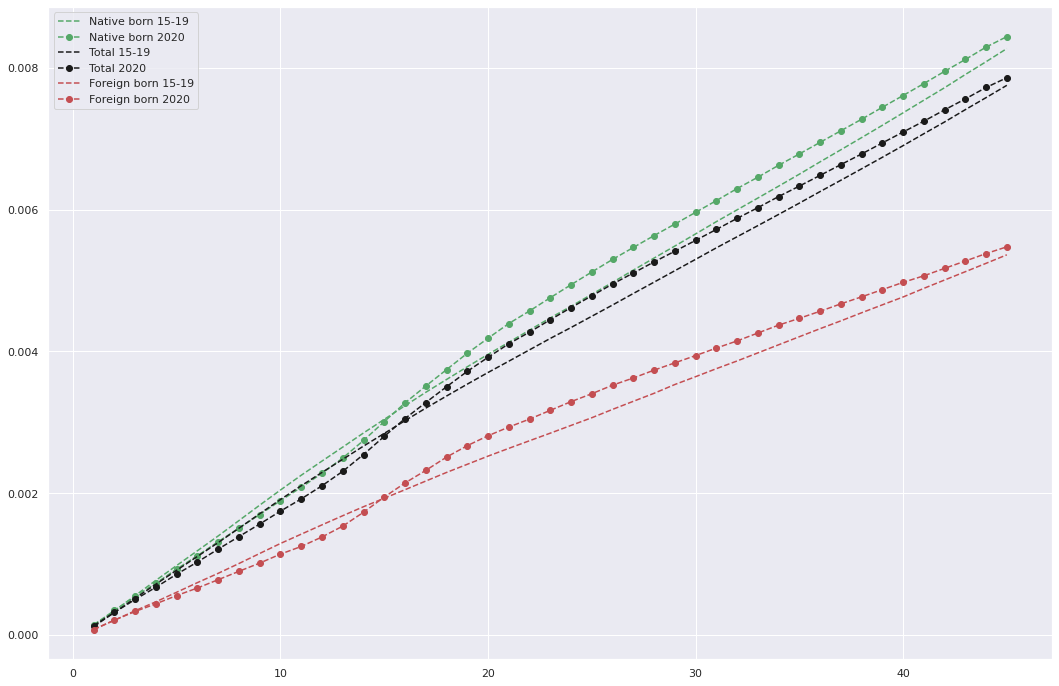

In [2220]:
mortality.cumsum().plot(figsize=(18,12),style=['g--','go--','k--','ko--','r--','ro--'])
plt.legend(['Native born 15-19','Native born 2020','Total 15-19','Total 2020',
           'Foreign born 15-19','Foreign born 2020'])

In [2221]:
mortality

,InrF 15-19,InrF 2020,Tot 15-19,Tot 2020,UtrF 15-19,UtrF 2020
1,0.000130,0.000148,0.000122,0.000134,0.000083,0.000078
2,0.000215,0.000201,0.000199,0.000188,0.000128,0.000135
3,0.000214,0.000197,0.000200,0.000182,0.000135,0.000121
4,0.000215,0.000188,0.000199,0.000172,0.000126,0.000108
5,0.000209,0.000200,0.000196,0.000184,0.000134,0.000116
6,0.000208,0.000188,0.000195,0.000172,0.000135,0.000106
7,0.000209,0.000197,0.000195,0.000182,0.000131,0.000117
8,0.000217,0.000191,0.000203,0.000177,0.000138,0.000118
9,0.000217,0.000192,0.000204,0.000177,0.000142,0.000116
10,0.000213,0.000195,0.000200,0.000182,0.000141,0.000126


In [2222]:
def select_pairs(colName):
    if 'InrF' in colName:
        return 'InrF'
    if 'UtrF' in colName:
        return 'UtrF'
    if 'Tot in colName':
        return 'Tot'

def diff(arr):
    return arr.iloc[:,1] - arr.iloc[:,0]

def growth(arr):
    return arr.iloc[:,1] / arr.iloc[:,0]
    
mort_diff = mortality.groupby(select_pairs,axis=1).agg(diff)

mort_growth = mortality.groupby(select_pairs,axis=1).agg(growth)

print (mort_diff)
print (mort_growth)

            InrF           Tot      UtrF
1   1.787299e-05  1.264394e-05 -0.000005
2  -1.396330e-05 -1.136339e-05  0.000007
3  -1.729714e-05 -1.792257e-05 -0.000013
4  -2.727394e-05 -2.695808e-05 -0.000018
5  -8.826832e-06 -1.197563e-05 -0.000018
6  -2.029909e-05 -2.326194e-05 -0.000029
7  -1.124754e-05 -1.314069e-05 -0.000014
8  -2.560323e-05 -2.588340e-05 -0.000020
9  -2.555860e-05 -2.687253e-05 -0.000026
10 -1.815870e-05 -1.873616e-05 -0.000015
11 -2.034892e-05 -2.224640e-05 -0.000023
12 -1.562338e-06 -1.887701e-06  0.000003
13  1.814907e-05  1.802673e-05  0.000024
14  4.829484e-05  5.103671e-05  0.000069
15  7.382469e-05  7.657021e-05  0.000094
16  7.172006e-05  7.184328e-05  0.000079
17  4.843802e-05  4.860609e-05  0.000055
18  5.059810e-05  5.256232e-05  0.000066
19  5.144949e-05  4.934530e-05  0.000046
20  3.690725e-05  3.342235e-05  0.000024
21  3.763602e-05  3.180009e-05  0.000013
22  5.308934e-06  4.088217e-06  0.000005
23  1.438886e-05  1.364752e-05  0.000016
24  1.962000e-05

<AxesSubplot:>

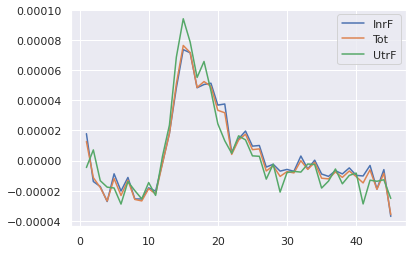

In [2223]:
mort_diff.plot()

<AxesSubplot:>

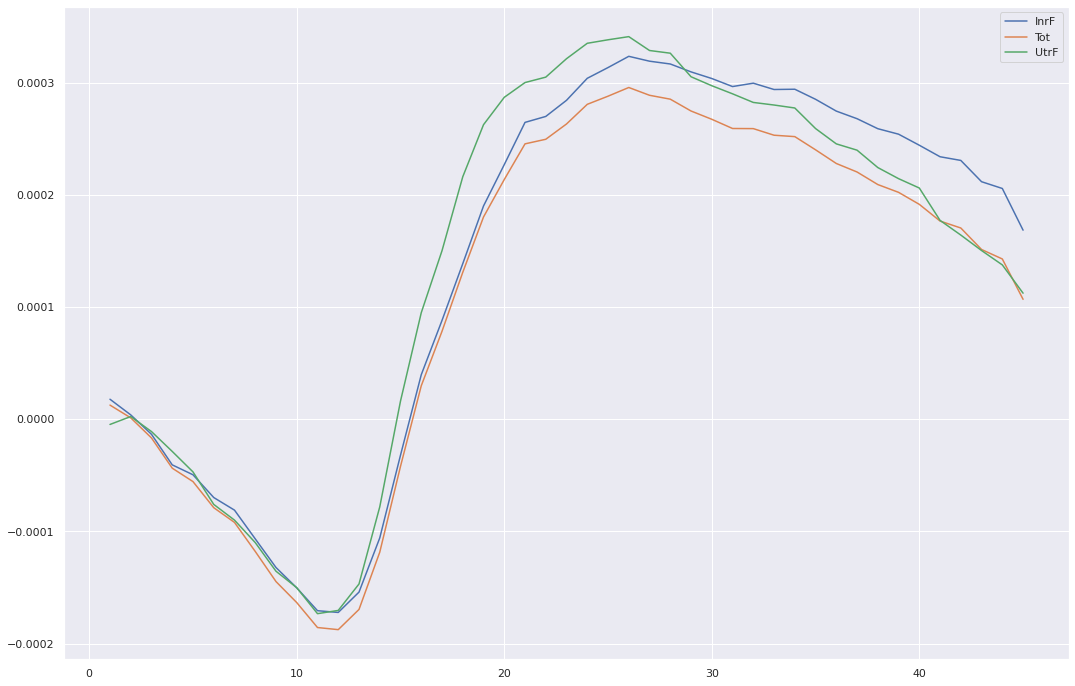

In [2224]:
mort_diff.cumsum().plot(figsize=(18,12))

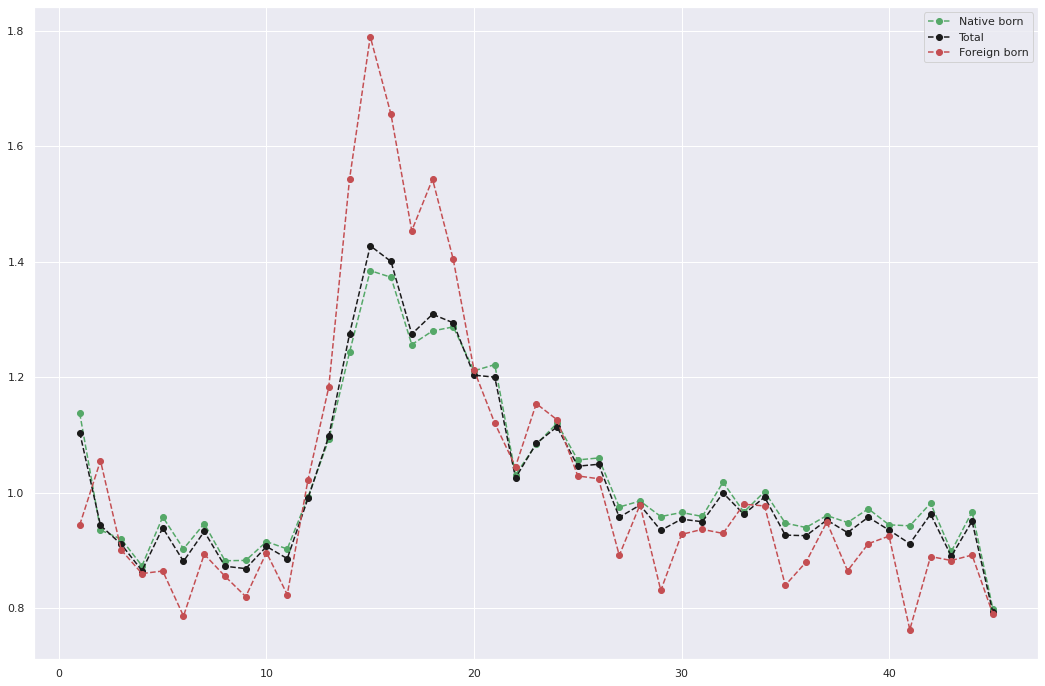

In [2225]:
mort_growth.plot(figsize=(18,12),style=['go--','ko--','ro--'])
plt.legend(['Native born','Total','Foreign born'])

In [2226]:
mort_cum = mortality.cumsum()
mort_cum_growth = mort_cum.groupby(select_pairs,axis=1).agg(growth)
mort_cum_growth

,InrF,Tot,UtrF
1,1.137408,1.103978,0.943901
2,1.011335,1.003989,1.011618
3,0.976047,0.968051,0.968277
4,0.947454,0.939445,0.939208
5,0.949652,0.939314,0.922538
6,0.941405,0.929033,0.897591
7,0.942099,0.929555,0.896913
8,0.934017,0.921857,0.891175
9,0.927897,0.915464,0.882385
10,0.926541,0.914528,0.883862


([<matplotlib.axis.YTick at 0x7f4d142e2d60>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

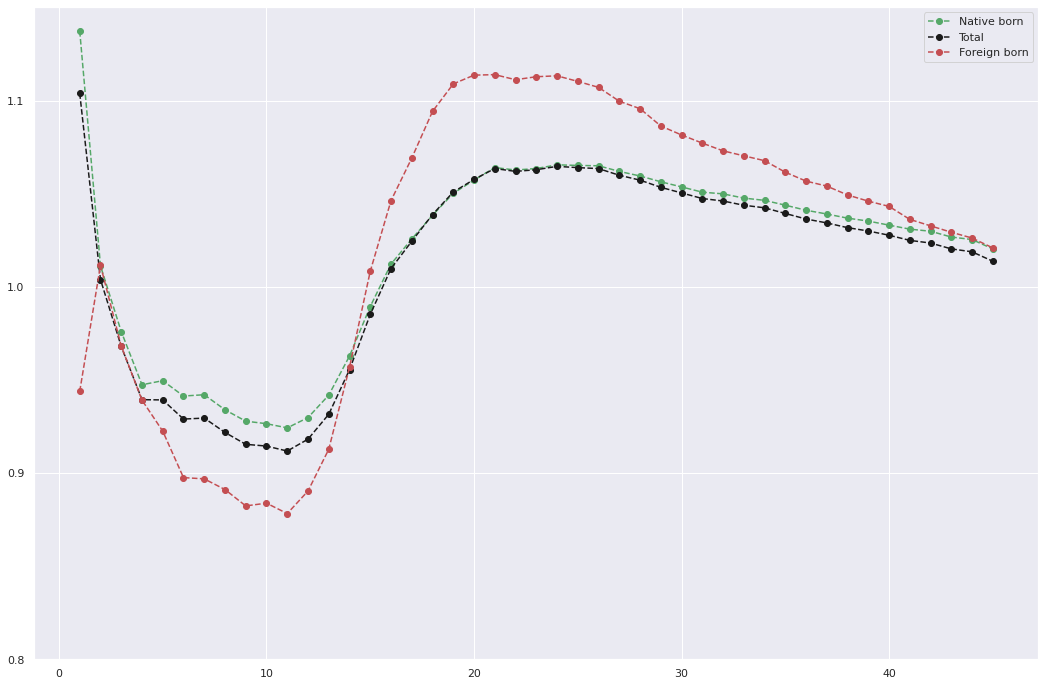

In [2227]:
mort_cum_growth.plot(figsize=(18,12),style=['go--','ko--','ro--'])
plt.legend(['Native born','Total','Foreign born'])
plt.yticks(np.arange(0.8,1.16,0.1))

In [2231]:
deaths = scb_migrant_deaths[:last_good_data]
deaths

,Tot 15-19,InrF 15-19,UtrF 15-19,Tot 2020,InrF 2020,UtrF 2020
1,1214.659992,1067.815638,146.832720,1386.440077,1229.107690,157.316038
2,1992.238828,1763.808094,228.360817,1942.454963,1668.955592,273.503700
3,1996.126723,1756.649782,239.450281,1878.734218,1634.014403,244.713836
4,1988.964812,1764.421664,224.458969,1778.014331,1558.993616,219.008602
5,1955.610773,1716.563234,239.039560,1898.261543,1663.817182,234.431743
6,1949.062740,1708.177783,240.887804,1774.931069,1560.021298,214.895764
7,1945.379472,1712.063724,233.289468,1875.650956,1639.152813,236.488161
8,2023.955860,1778.124718,245.816455,1825.291013,1586.741031,238.544580
9,2035.824168,1783.851368,251.977268,1827.346521,1592.907123,234.431743
10,2002.265503,1751.536702,250.745106,1876.678710,1621.682219,254.995930


In [2232]:
deaths.sum()

Tot 15-19     77429.663488
InrF 15-19    67888.204529
UtrF 15-19     9541.457089
Tot 2020      81160.701569
InrF 2020     70103.328634
UtrF 2020     11057.363855
dtype: float64

     InrF 15-19  InrF 2020  Tot 15-19  Tot 2020  UtrF 15-19  UtrF 2020
pop     0.00827   0.008438   0.007752  0.007859    0.005362   0.005475


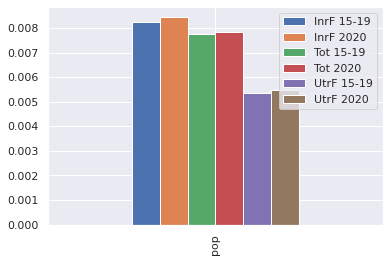

In [2236]:
(deaths.sum() / pop).plot(kind='bar')
print (deaths.sum() / pop)



In [2235]:
mortality.sum()

InrF 15-19    0.008270
InrF 2020     0.008438
Tot 15-19     0.007752
Tot 2020      0.007859
UtrF 15-19    0.005362
UtrF 2020     0.005475
dtype: float64

In [2239]:
sums = deaths.sum()
sums

Tot 15-19     77429.663488
InrF 15-19    67888.204529
UtrF 15-19     9541.457089
Tot 2020      81160.701569
InrF 2020     70103.328634
UtrF 2020     11057.363855
dtype: float64

In [2243]:
print (sums['InrF 15-19'] / sums['Tot 15-19'])
print (sums['InrF 2020'] / sums['Tot 2020'])

0.8767725632660335
0.8637595200497531
